In [3]:
import os
import dicom2nifti

def convert_series_to_nifti(dicom_series_directory, output_nifti_file):
    dicom2nifti.dicom_series_to_nifti(dicom_series_directory, output_nifti_file, reorient_nifti=False)

def ensure_directory_exists(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

def main():
    root_dir = r'D:\Juntao\Data\ANDI3-T1\ADNI'
    output_root_dir = r'D:\Juntao\Data\ANDI3-T1\preprocessed'
    
    ensure_directory_exists(output_root_dir)
    
    for patient_id_folder in os.listdir(root_dir):
        patient_dir = os.path.join(root_dir, patient_id_folder)
        if os.path.isdir(patient_dir):
            for sub_dir, dirs, files in os.walk(patient_dir):
                # Skip the specific folder 'Accelerated_Sagittal_MPRAGE_ND'
                if 'Accelerated_Sagittal_MPRAGE_ND' in sub_dir:
                    continue

                if any(f.lower().endswith('.dcm') for f in files):
                    # Construct the full path for the output file
                    output_nifti_file = os.path.join(output_root_dir, f"{patient_id_folder}.nii")
                    # Convert the DICOM series to NIfTI
                    convert_series_to_nifti(sub_dir, output_nifti_file)
                    break  # Stop further traversal after finding DICOM files


if __name__ == "__main__":
    main()


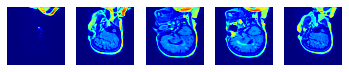

In [27]:
import os
import random
import nibabel as nib
import matplotlib.pyplot as plt

def load_random_nifti(nifti_directory):
    # 获取所有的.nii文件
    nifti_files = [f for f in os.listdir(nifti_directory) if f.endswith('.nii')]
    # 从中随机选择一个
    random_nifti_file = random.choice(nifti_files)
    return nib.load(os.path.join(nifti_directory, random_nifti_file))

def show_slices(nifti_img, num_slices=5, colormap='jet'):
    # 获取图像数据
    img_data = nifti_img.get_fdata()
    # 选择在中轴面上均匀分布的切片
    slice_indices = [img_data.shape[2] * i // num_slices for i in range(num_slices)]
    # 设置绘图
    fig, axes = plt.subplots(1, num_slices)
    for i, slice_index in enumerate(slice_indices):
        # 显示指定的切片
        axes[i].imshow(img_data[:, :, slice_index].T, cmap=colormap, origin="lower")
        axes[i].axis('off')
    plt.show()

# 设置NIfTI文件所在的目录
nifti_directory = 'D:\\Work\\Medical image\\3DFLAIR-ADNI3\\preprocessed'
# 加载随机的NIfTI文件
nifti_img = load_random_nifti(nifti_directory)
# 显示5个切片
show_slices(nifti_img, num_slices=5, colormap='jet')


In [1]:
import os
import subprocess

def process_with_conform(input_nifti_file, output_nifti_file):
    # 调用conform.py脚本处理NIfTI文件
    subprocess.run(['python', r'D:\Juntao\Code\conform.py', '-i', input_nifti_file, '-o', output_nifti_file], check=True)

def ensure_directory_exists(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

def main():
    input_directory = r'D:\Juntao\Data\ANDI3-T1\preprocessed'
    output_directory = r'D:\Juntao\Data\ANDI3-T1\resized'
    
    ensure_directory_exists(output_directory)
    
    # 遍历预处理后的NIfTI文件
    for nifti_file in os.listdir(input_directory):
        if nifti_file.endswith('.nii'):
            input_nifti_path = os.path.join(input_directory, nifti_file)
            output_nifti_path = os.path.join(output_directory, nifti_file)
            # 对每个文件使用conform.py进行处理
            process_with_conform(input_nifti_path, output_nifti_path)

if __name__ == "__main__":
    main()


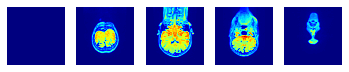

In [29]:
nifti_directory = 'D:\\Work\\Medical image\\3DFLAIR-ADNI3\\resized'
nifti_img = load_random_nifti(nifti_directory)
show_slices(nifti_img, num_slices=5, colormap='jet')

## After you got the segemented files

In [1]:
import shutil
import os

# Source and destination paths
source_path = "E:\\2023\\segemented_raw"  # Your source folder
destination_path = "D:\\Juntao\\Data\\ANDI3-T1\\segmented_raw"  # Your destination folder

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_path):
    os.makedirs(destination_path)

# Function to copy the contents
def copy_contents(src, dst):
    error_folders = []
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        try:
            if os.path.isdir(s):
                shutil.copytree(s, d, dirs_exist_ok=True)  # 'dirs_exist_ok' handles existing directories
            else:
                shutil.copy2(s, d)
        except Exception as e:
            error_folders.append(s)
            print(f"Error copying {s}: {e}")
    return error_folders

# Copy the contents and catch any errors
error_folders = copy_contents(source_path, destination_path)

# Output any errors
if error_folders:
    print("Errors occurred in the following folders:")
    for folder in error_folders:
        print(folder)
else:
    print("All files copied successfully.")


Error copying E:\2023\segemented_raw\033_S_6824: [('E:\\2023\\segemented_raw\\033_S_6824\\mri', 'D:\\Juntao\\Data\\ANDI3-T1\\segmented_raw\\033_S_6824\\mri', "[WinError 1392] The file or directory is corrupted and unreadable: 'E:\\\\2023\\\\segemented_raw\\\\033_S_6824\\\\mri'")]
Error copying E:\2023\segemented_raw\033_S_6889: [('E:\\2023\\segemented_raw\\033_S_6889\\mri', 'D:\\Juntao\\Data\\ANDI3-T1\\segmented_raw\\033_S_6889\\mri', "[WinError 1392] The file or directory is corrupted and unreadable: 'E:\\\\2023\\\\segemented_raw\\\\033_S_6889\\\\mri'")]
Error copying E:\2023\segemented_raw\033_S_6969: [('E:\\2023\\segemented_raw\\033_S_6969\\mri', 'D:\\Juntao\\Data\\ANDI3-T1\\segmented_raw\\033_S_6969\\mri', "[WinError 1392] The file or directory is corrupted and unreadable: 'E:\\\\2023\\\\segemented_raw\\\\033_S_6969\\\\mri'")]
Error copying E:\2023\segemented_raw\033_S_6976: [('E:\\2023\\segemented_raw\\033_S_6976\\mri', 'D:\\Juntao\\Data\\ANDI3-T1\\segmented_raw\\033_S_6976\\mri',

In [2]:
! pip install nibabel

In [1]:
import os
import nibabel as nib

source_dir = r"D:\Juntao\Data\2023.12\segemented"
target_root_dir = r"D:\Juntao\Data\2023.12\nii_format"

if not os.path.exists(target_root_dir):
    os.makedirs(target_root_dir)

for root, dirs, files in os.walk(source_dir):
    for file_name in files:
        if file_name.endswith('.mgz'):
            source_file = os.path.join(root, file_name)
            target_dir = root.replace(source_dir, target_root_dir)
            target_file = os.path.join(target_dir, file_name.replace('.mgz', '.nii'))

            if not os.path.exists(target_dir):
                os.makedirs(target_dir)

            mgz_image = nib.load(source_file)

            nib.save(mgz_image, target_file)

print("All MGZ files have been converted to NII format.")


All MGZ files have been converted to NII format.


In [2]:
import os
import shutil

# 设置源文件夹和目标文件夹
source_dir = r"D:\Juntao\Data\2023.12\nii_format"
target_dir = r"D:\Juntao\Data\2023.12\auto_noCCseg"

# 确保目标文件夹存在
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# 遍历每个子文件夹
for patient_id in os.listdir(source_dir):
    patient_folder = os.path.join(source_dir, patient_id)
    if os.path.isdir(patient_folder):
        # 构建特定文件的路径
        specific_file = os.path.join(patient_folder, "mri", "aseg.auto_noCCseg.nii")
        if os.path.exists(specific_file):
            # 构建新的文件名和路径
            new_file_name = patient_id + ".nii"
            new_file_path = os.path.join(target_dir, new_file_name)

            # 复制并重命名文件
            shutil.copy(specific_file, new_file_path)
            # print(f"Copied and renamed {specific_file} to {new_file_path}")

print("All files have been processed.")


All files have been processed.


In [7]:
import os
import shutil

# 设置源文件夹和目标文件夹
source_dir = r"D:\Juntao\Data\2023.12\nii_format"
target_dir = r"D:\Juntao\Data\2023.12\orig_nu"

# 确保目标文件夹存在
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# 遍历每个子文件夹
for patient_id in os.listdir(source_dir):
    patient_folder = os.path.join(source_dir, patient_id)
    if os.path.isdir(patient_folder):
        # 构建特定文件的路径
        specific_file = os.path.join(patient_folder, "mri", "orig_nu.nii")
        if os.path.exists(specific_file):
            # 构建新的文件名和路径
            new_file_name = patient_id + ".nii"
            new_file_path = os.path.join(target_dir, new_file_name)

            # 复制并重命名文件
            shutil.copy(specific_file, new_file_path)
            # print(f"Copied and renamed {specific_file} to {new_file_path}")

print("All files have been processed.")


All files have been processed.


In [3]:
import pandas as pd
import os
import nibabel as nib

# Directory paths
nii_folder_path = r'D:\Juntao\Data\2023.12\auto_noCCseg'
csv_file_path = r'D:\Juntao\Data\2023.12\12_13_2023_12_13_2023.csv'

# Label targets
label_target = ['AD', 'CN']

# Read the CSV file
df = pd.read_csv(csv_file_path)

# Filter the dataframe based on label targets
filtered_df = df[df['Group'].isin(label_target)]

# List to keep track of valid subject IDs
valid_subject_ids = []

# Check for the existence of .nii files corresponding to the filtered subject IDs
for file_name in os.listdir(nii_folder_path):
    if file_name.endswith('.nii'):
        # Remove the file extension to get the subject ID
        subject_id = file_name.split('.')[0]

        # Check if the subject ID is in the filtered dataframe and add it to the list
        if subject_id in filtered_df['Image Data ID'].values:
            valid_subject_ids.append(subject_id)

# Filter the dataframe to include only those subject IDs that have a corresponding .nii file
final_df = filtered_df[filtered_df['Image Data ID'].isin(valid_subject_ids)]

# Path for the new CSV file
new_csv_file_path = r'D:\Juntao\Data\2023.12\filtered_data.csv'

# Save the filtered data to a new CSV file
final_df.to_csv(new_csv_file_path, index=False)


In [5]:
import pandas as pd
import numpy as np

# Directory paths
csv_file_path = r'D:\Juntao\Data\2023.12\filtered_data.csv'

# Label targets
label_target = ['AD', 'CN']

# Read the CSV file
df = pd.read_csv(csv_file_path)

# Count the number of 'AD' samples
ad_count = df[df['Group'] == 'AD'].shape[0]

# Randomly select the same number of 'CN' samples
cn_samples = df[df['Group'] == 'CN'].sample(n=ad_count)

# Combine AD and selected CN samples
selected_samples = pd.concat([df[df['Group'] == 'AD'], cn_samples])

# Generate a list of selected sample names
selected_sample_names = selected_samples['Image Data ID'].tolist()


new_csv_file_path = r'D:\Juntao\Data\2023.12\filtered_data_balance.csv'
selected_samples.to_csv(new_csv_file_path, index=False)


In [8]:
import shutil
import os

# Directory paths
source_folder_path = r'D:\Juntao\Data\2023.12\orig_nu'
destination_folder_path = r'D:\Juntao\Data\2023.12\orig_nu_balance'

# 确保目标文件夹存在
if not os.path.exists(destination_folder_path):
    os.makedirs(destination_folder_path)

# 对于selected_samples中的每个样本
for subject_id in selected_sample_names:
    file_name = subject_id + '.nii'  # 假设文件名是subject_id后跟'.nii'
    source_file = os.path.join(source_folder_path, file_name)
    destination_file = os.path.join(destination_folder_path, file_name)

    # 检查文件是否存在于源文件夹中
    if os.path.exists(source_file):
        # 复制文件
        shutil.copy2(source_file, destination_file)
    else:
        print(f"File not found: {source_file}")
